<a href="https://colab.research.google.com/github/RINDHYA-26/RINDHYA-OIBSIP-TASK/blob/main_code/TASK3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK -- 3  **CAR PRICE PREDICTION**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("car_price.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


NO MISSING VALUES

In [4]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


INFORMATION OF DATASET

In [7]:
data.info()
data.describe()
data.CarName

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [8]:
car_company = data["CarName"].str.split(" ", n = 1, expand = True)
data['CarCompany'] = car_company[0]

# Dropping 'CarName' column
data.drop(['CarName', 'car_ID'], axis=1, inplace=True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
replacement_mapping = {
    '4wd': 'fwd',
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'Nissan': 'nissan',
    'vw': 'volkswagen'
}

data['drivewheel'] = data['drivewheel'].replace({'4wd': 'fwd'})
data['CarCompany'] = data['CarCompany'].replace(replacement_mapping)


VISUALIZING BOX PLOT TO CHECK FOR OUTLIERS

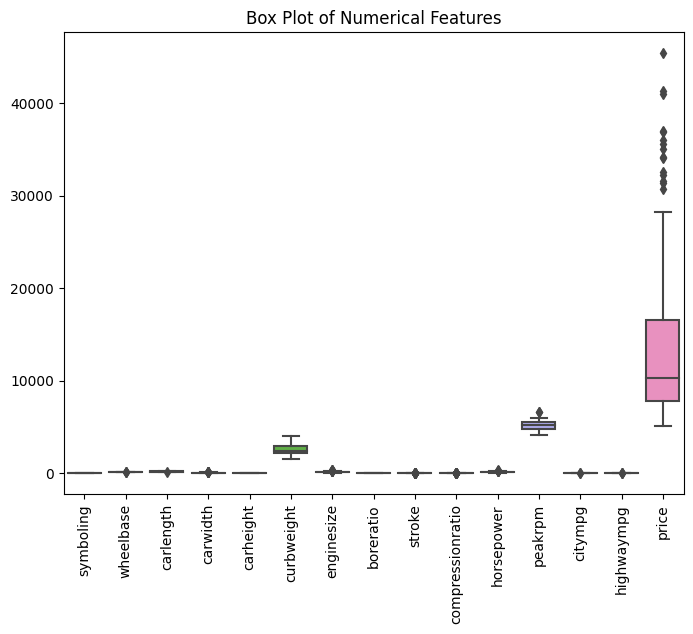

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()


REMOVING OUTLIERS

In [11]:
col_numeric = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

for x in col_numeric:
    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr

    # Remove outliers and update the DataFrame
    data = data[(data[x] >= range_low) & (data[x] <= range_high)]

# Check the shape of the DataFrame after removing outliers
print(data.shape)

(125, 25)


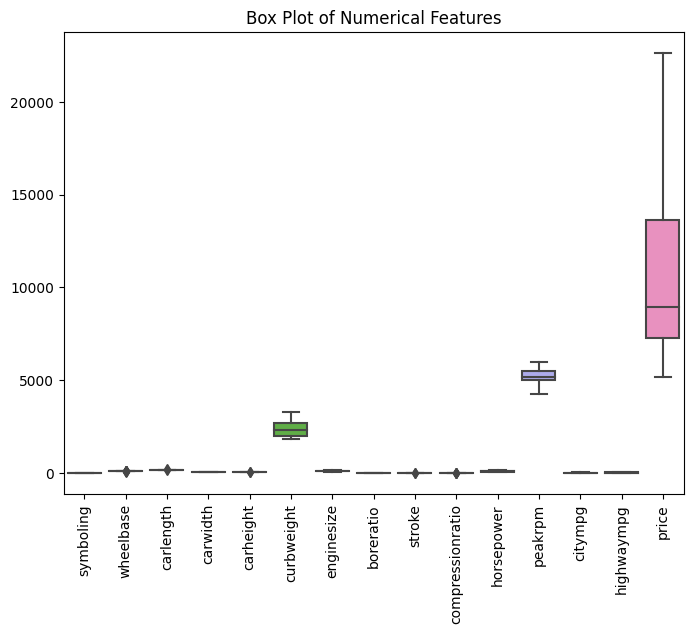

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Features')
plt.show()

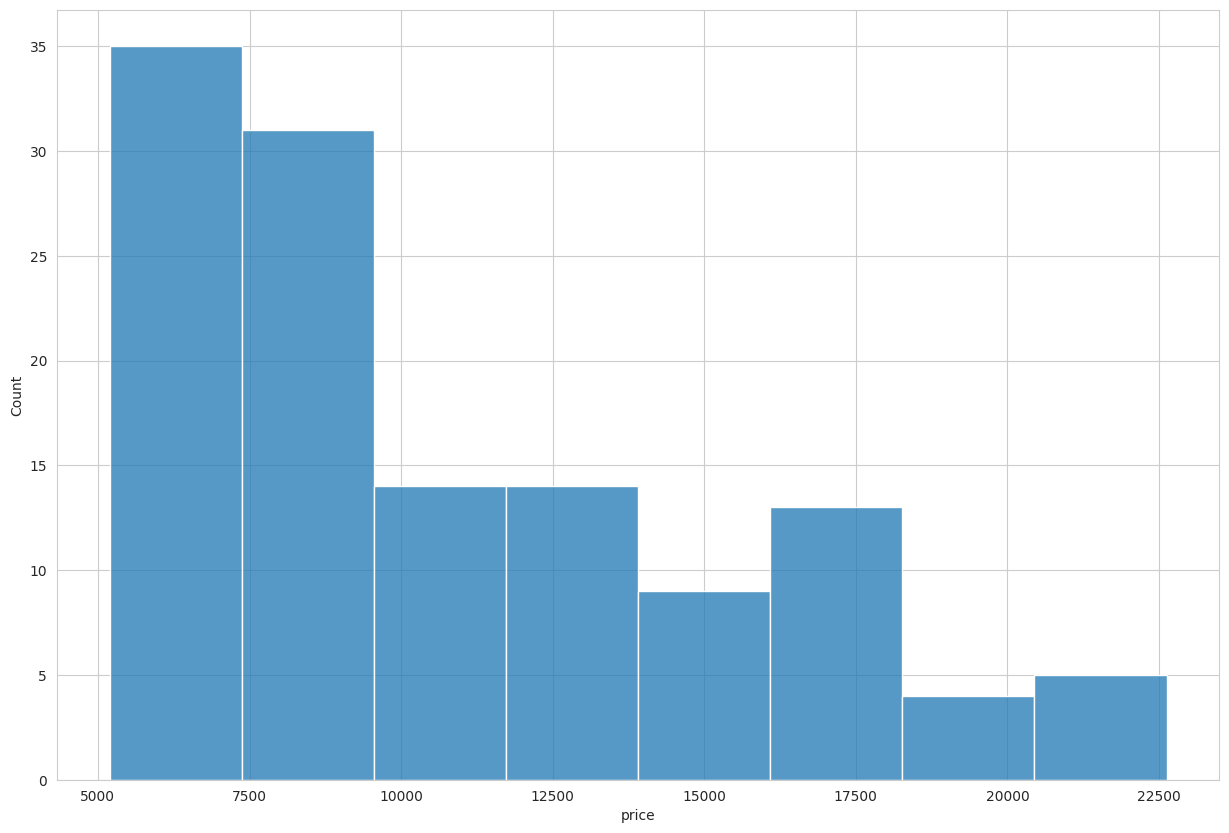

In [20]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.histplot(data.price)
plt.show()

In [21]:
#to check the correlation
print(data.corr())

                  symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.478842  -0.262483 -0.105779  -0.546503   
wheelbase         -0.478842   1.000000   0.823198  0.762149   0.561637   
carlength         -0.262483   0.823198   1.000000  0.788814   0.461815   
carwidth          -0.105779   0.762149   0.788814  1.000000   0.220544   
carheight         -0.546503   0.561637   0.461815  0.220544   1.000000   
curbweight        -0.171182   0.735272   0.866308  0.805012   0.315943   
enginesize        -0.148090   0.566381   0.697109  0.676050   0.152282   
boreratio         -0.086965   0.632324   0.760899  0.717061   0.216540   
stroke             0.027223   0.024876   0.019787  0.067308  -0.017882   
compressionratio   0.141774  -0.282282  -0.284157 -0.214049  -0.278989   
horsepower         0.078235   0.523130   0.682334  0.739608   0.036585   
peakrpm            0.145561  -0.122435  -0.206478  0.000498  -0.211135   
citympg           -0.097115  -0.565479

<ipython-input-21-f393ab5c5a12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


<ipython-input-28-678d8a4fb773>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


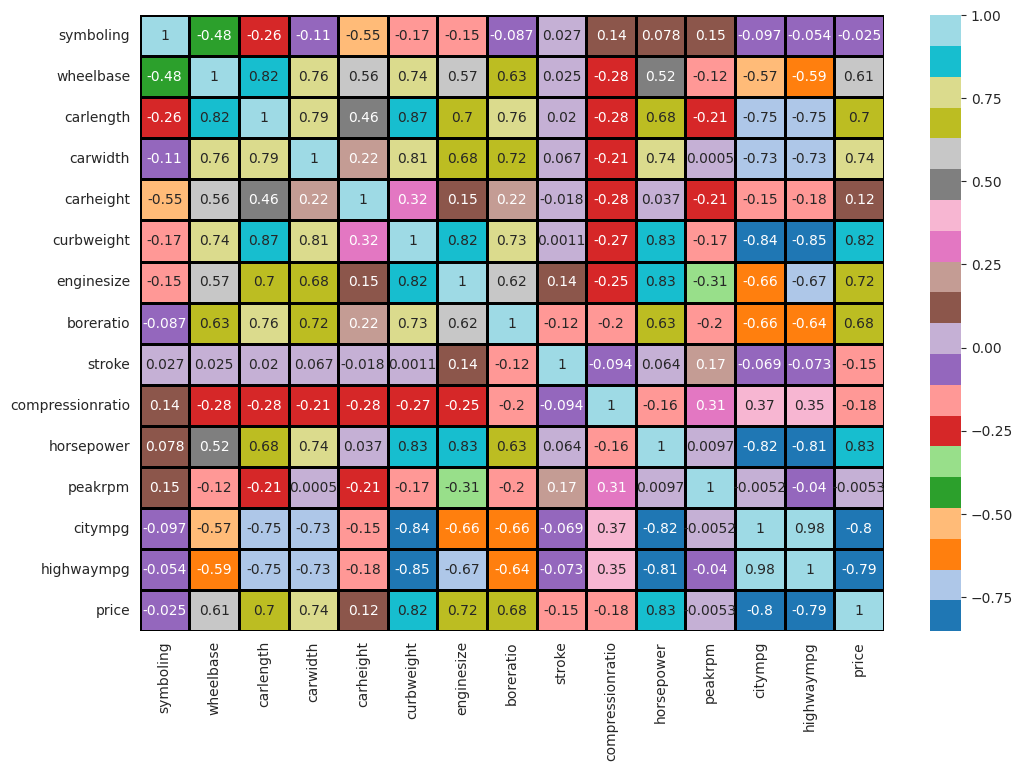

In [28]:
plt.figure(figsize=(12,8))
correlation=data.corr()
sns.heatmap(correlation,cmap="tab20",linecolor="black",linewidths=2,annot=True)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
predict="price"
data=data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]
x=np.array(data.drop([predict],1))
y=np.array(data[predict])
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
prediction=model.predict(x_test)


<ipython-input-36-a2419e36342f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(data.drop([predict],1))


Accuracy

In [39]:
from sklearn.metrics import mean_absolute_error
model.score(x_test,prediction)


1.0

Hence I get 100% accuracy for the given dataset for car price prediction